# **Worksheet 6**

In [ ]:
import pandas as pd
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%B-%Y')
data = {}
data['Axis'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Axis.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Federal'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Federal.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Baroda'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Baroda.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['SBI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/SBI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['HDFC'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/HDFC.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['ICICI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/ICICI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['PNB'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/PNB.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['KotakMahindra'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/KotakMahindra.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')

## Probability Stock Goes Up or Down



In [ ]:
import numpy as np

upPercent = {}
downPercent = {}
upProb = {}
downProb = {}

for ticker in data:
    n = len(data[ticker]['Close Price'])
    upPercent[ticker] = np.mean((data[ticker]['High Price'] - data[ticker]['Open Price']) / data[ticker]['Open Price'])
    downPercent[ticker] = np.mean((data[ticker]['Open Price'] - data[ticker]['Low Price']) / data[ticker]['Open Price'])
    upProb[ticker] = 0
    downProb[ticker] = 0
    for i in range(n - 1):
        if data[ticker]['Close Price'].iloc[i + 1] > data[ticker]['Close Price'].iloc[i]:
            upProb[ticker] += 1
        else:
            downProb[ticker] += 1
    upProb[ticker] /= n - 1
    downProb[ticker] /= n - 1

print("Average percentage of going up:")
print(upPercent)
print("Average percentage of going down:")
print(downPercent)
print("Probability of going up:")
print(upProb)
print("Probability og goin down:")
print(downProb)

Average percentage of going up:
{'Axis': 0.09703961132598542, 'Federal': 0.09437109462115316, 'Baroda': 0.1022066831770633, 'SBI': 0.08950939053068754, 'HDFC': 0.06558440393925154, 'ICICI': 0.08682544041606376, 'PNB': 0.1039209928333749, 'KotakMahindra': 0.09036667835062494}
Average percentage of going down:
{'Axis': 0.07954892364788035, 'Federal': 0.08713740625576365, 'Baroda': 0.0913785056850646, 'SBI': 0.07735089289058464, 'HDFC': 0.061879838140104226, 'ICICI': 0.07847954408556765, 'PNB': 0.09464592193749026, 'KotakMahindra': 0.0739645821812158}
Probability of going up:
{'Axis': 0.5782608695652174, 'Federal': 0.5565217391304348, 'Baroda': 0.5478260869565217, 'SBI': 0.508695652173913, 'HDFC': 0.5826086956521739, 'ICICI': 0.5782608695652174, 'PNB': 0.48695652173913045, 'KotakMahindra': 0.591304347826087}
Probability og goin down:
{'Axis': 0.4217391304347826, 'Federal': 0.4434782608695652, 'Baroda': 0.45217391304347826, 'SBI': 0.49130434782608695, 'HDFC': 0.41739130434782606, 'ICICI': 

## Risk and Return

In [ ]:
for ticker in data:
    data[ticker]['RoR'] = (data[ticker]['Close Price'] - data[ticker]['Open Price']) / data[ticker]['Open Price']

mu = np.array([data[ticker]['RoR'].mean() for ticker in data])
sigma = np.array([data[ticker]['RoR'].std() for ticker in data])

print("Returns:", mu)
print("Risk:", sigma)

Returns: [0.01583506 0.00524723 0.00816797 0.00930362 0.009692   0.01079337
 0.00303806 0.01317141]
Risk: [0.12291422 0.12444104 0.13300377 0.12481397 0.09890515 0.11978279
 0.14154091 0.12076882]


## Correlation

In [ ]:
correlation = np.corrcoef([data[ticker]['RoR'] for ticker in data])

print("Correlation Matrix:")
print(pd.DataFrame(correlation, columns = data.keys(), index = data.keys()))

Correlation Matrix:
                   Axis   Federal    Baroda       SBI      HDFC     ICICI  \
Axis           1.000000  0.504033  0.460698  0.563661  0.529982  0.623664   
Federal        0.504033  1.000000  0.471273  0.499565  0.367363  0.492988   
Baroda         0.460698  0.471273  1.000000  0.592195  0.349159  0.528062   
SBI            0.563661  0.499565  0.592195  1.000000  0.450494  0.596380   
HDFC           0.529982  0.367363  0.349159  0.450494  1.000000  0.516064   
ICICI          0.623664  0.492988  0.528062  0.596380  0.516064  1.000000   
PNB            0.500864  0.469952  0.696620  0.599768  0.364987  0.694514   
KotakMahindra  0.493489  0.505297  0.407223  0.461918  0.472094  0.547384   

                    PNB  KotakMahindra  
Axis           0.500864       0.493489  
Federal        0.469952       0.505297  
Baroda         0.696620       0.407223  
SBI            0.599768       0.461918  
HDFC           0.364987       0.472094  
ICICI          0.694514       0.547384  

## Minimum  Variance Portfolio

In [ ]:
from scipy.optimize import minimize
import math

def weightConstraint(weights):
    return np.sum(weights) - 1.0

def minObjectiveFun(weights, covMatrix):
    return np.dot(weights, np.dot(covMatrix, weights))

def minVar(mu, cov):
    print("Minimizing Risk")
    initialWeights = np.ones(len(mu)) / len(mu)
    constraints = ({'type': 'eq', 'fun': weightConstraint})
    result = minimize(minObjectiveFun, initialWeights, args = (cov), method = 'SLSQP', constraints = constraints)
    optimalWeights = result.x

    print("Optimal Weights:", result.x)
    print("Portfolio Risk:", math.sqrt(result.fun))
    print('Portfolio Expected Return:', np.dot(optimalWeights, mu))

    return optimalWeights, math.sqrt(result.fun), np.dot(optimalWeights, mu)

covMatrix = np.array(np.cov([data[ticker]['RoR'] for ticker in data]))
mvp = minVar(mu, covMatrix)

Minimizing Risk
Optimal Weights: [ 0.03421829  0.1451045   0.12758127  0.0621347   0.47556919  0.04128729
 -0.0144475   0.12855225]
Portfolio Risk: 0.08586508147330325
Portfolio Expected Return: 0.009627569227652226


## Regression Line between Open and LTP

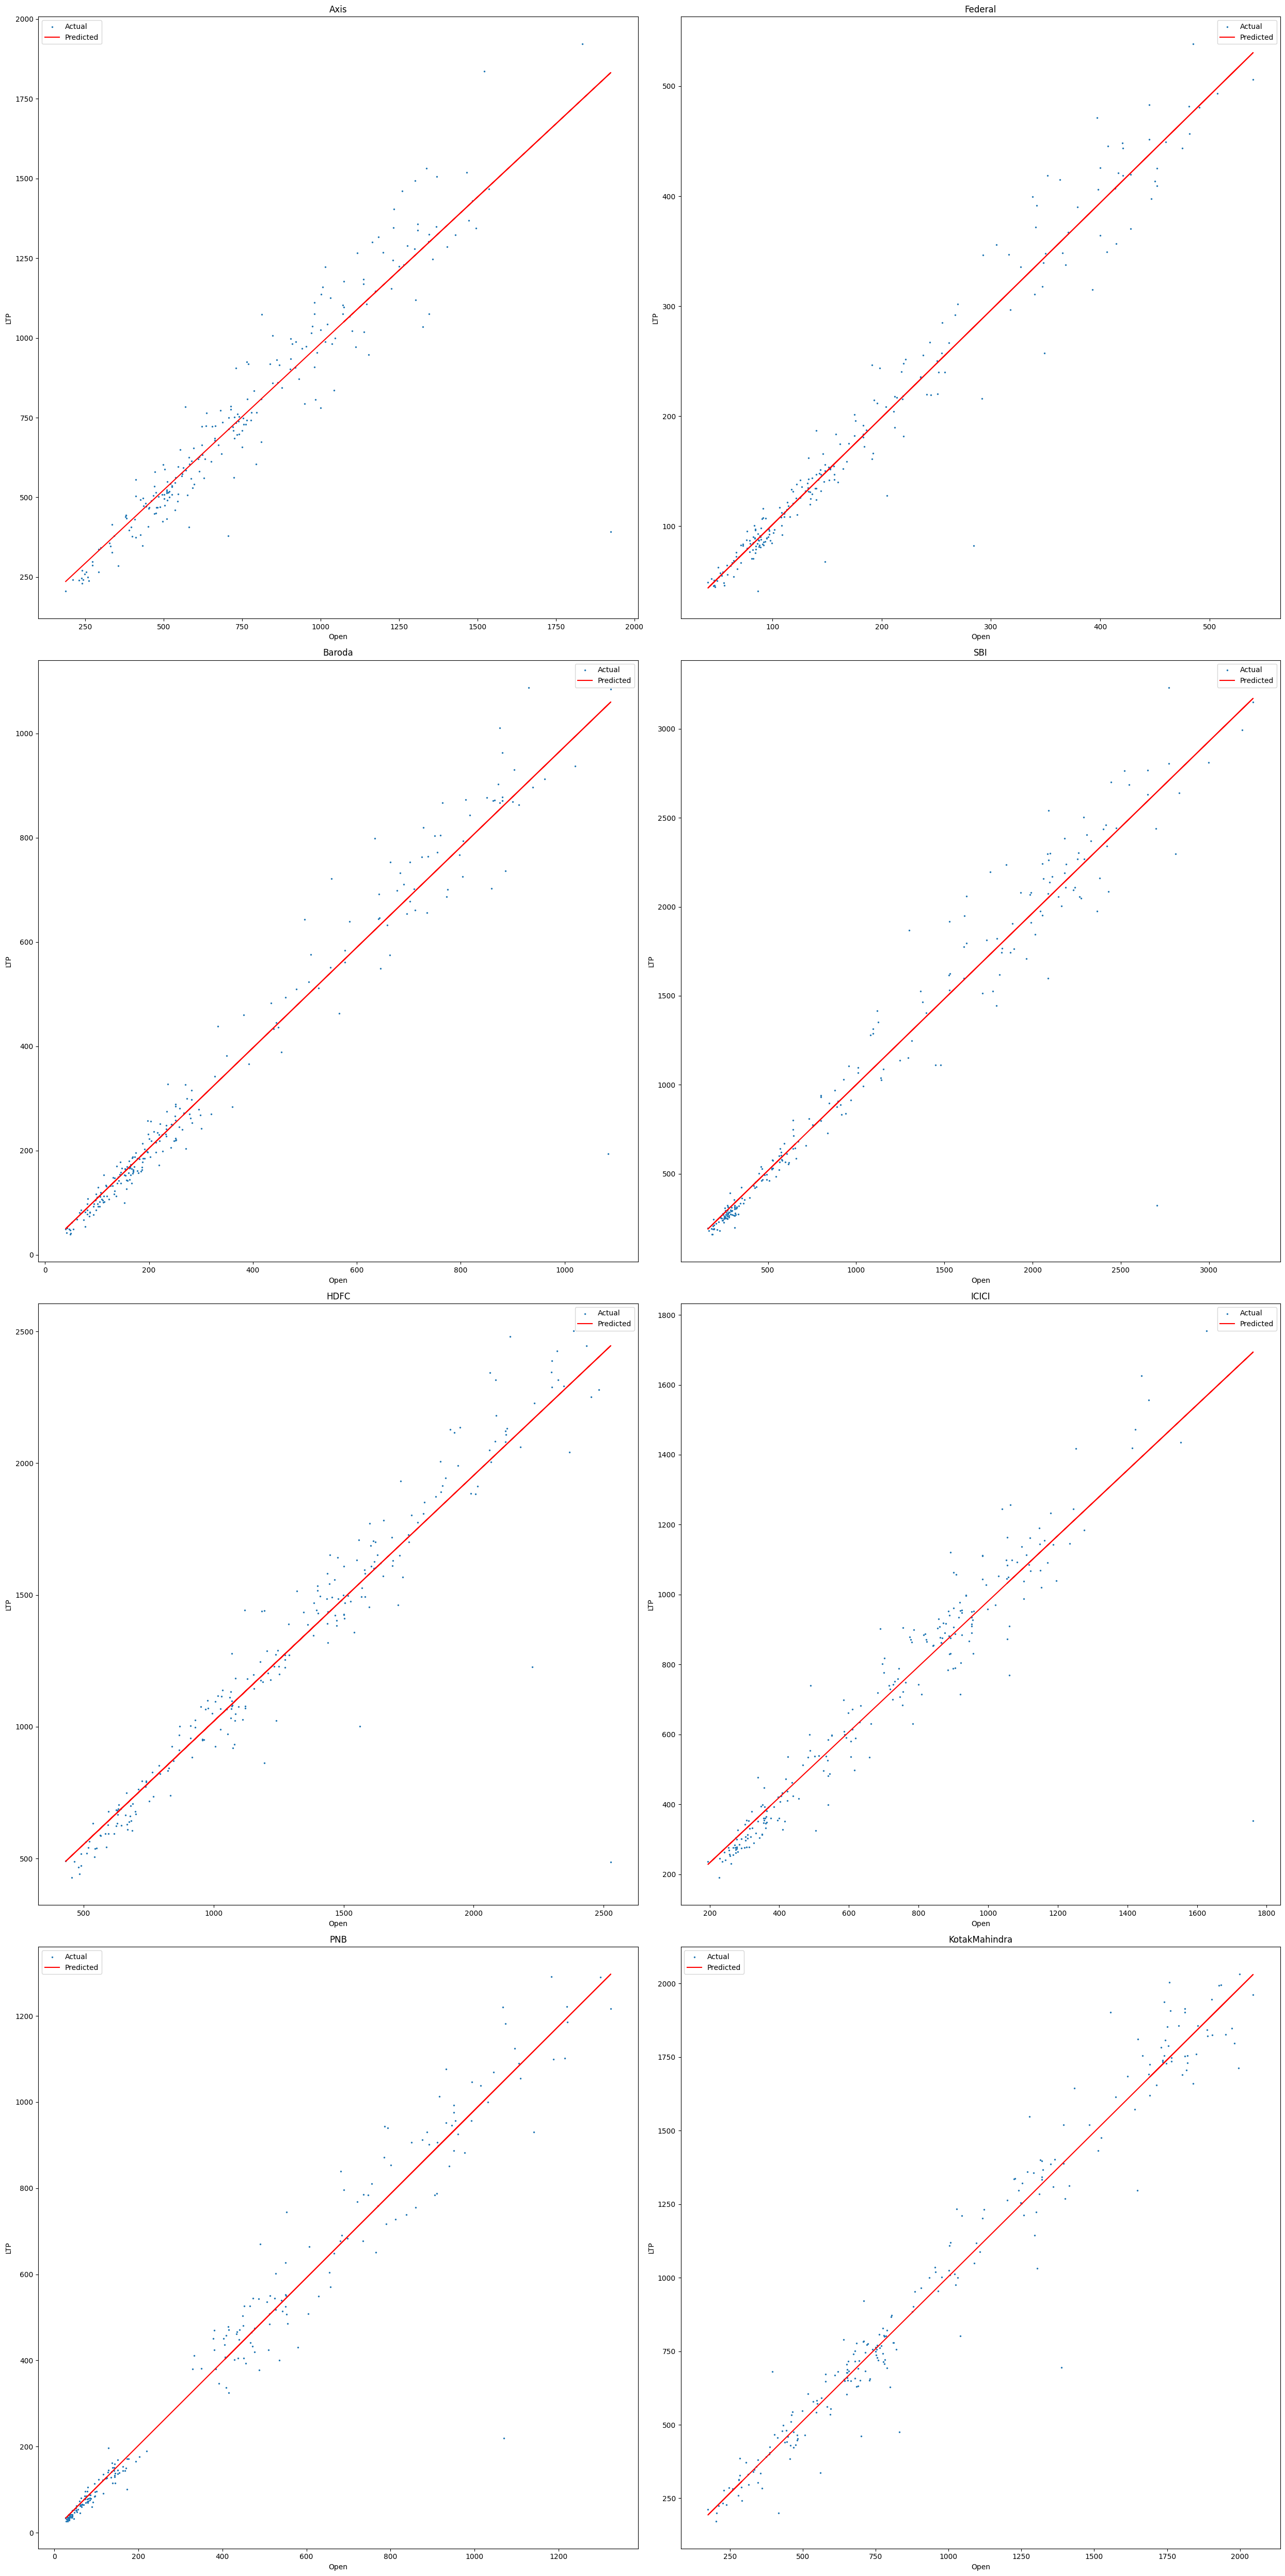

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize = (25, 50))
axes = axes.ravel()

for i, ticker in enumerate(data):
    X = data[ticker]['Open Price'].values.reshape(-1, 1)
    Y = data[ticker]['Close Price'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    axes[i].scatter(X, Y, label = 'Actual', s = 2)
    axes[i].plot(X, reg.predict(X), color = 'red', label = 'Predicted')
    axes[i].set_title(ticker)
    axes[i].set_xlabel('Open')
    axes[i].set_ylabel('LTP')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Beta Values

In [ ]:
def covariance(x, y):
    n = len(x)
    meanX = np.mean(x)
    meanY = np.mean(y)
    total = 0
    for i in range(n):
        total += (x[i] - meanX) * (y[i] - meanY)
    return total / n

beta = {}
betaV = 0

for i, ticker in enumerate(data):
    X = list(data[ticker]['RoR'])
    Y = list(data['ICICI']['RoR'])

    beta[ticker] = covariance(X, Y) / np.var(Y)
    betaV += mvp[0][i] * beta[ticker]

print("Beta Values:")
print(beta)
print("Beta Value of MVP:", betaV)

Beta Values:
{'Axis': 0.6399683952815791, 'Federal': 0.5121597529533072, 'Baroda': 0.5863461277377309, 'SBI': 0.6214296519117629, 'HDFC': 0.4261161140298787, 'ICICI': 1.0, 'PNB': 0.8206701136849964, 'KotakMahindra': 0.5518897641645049}
Beta Value of MVP: 0.5126594694861921


## Risk-Return Graph

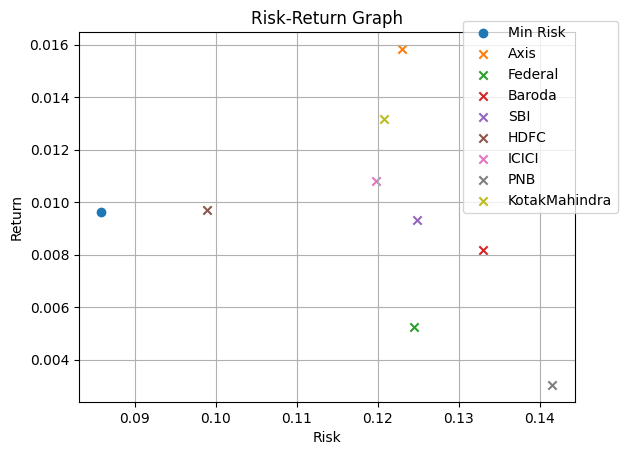

In [ ]:
plt.scatter(mvp[1], mvp[2], label = 'Min Risk', marker = 'o')
for i, ticker in enumerate(data):
    plt.scatter(sigma[i], mu[i], label = ticker, marker = 'x')
plt.grid(True)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Risk-Return Graph')
plt.show()

## Expected Return using CAPM

In [ ]:
riskFreeRate = 0.06

expReturn = riskFreeRate + betaV * (np.mean(data['ICICI']['RoR']) - riskFreeRate)
print("Expected Return of the Portfolio: ", expReturn * 100, "%", sep = '')

Expected Return of the Portfolio: 3.477375421345229%


# **Worksheet 7**

In [ ]:
import pandas as pd
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%B-%Y')
data = {}
data['Axis'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Axis.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Federal'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Federal.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Baroda'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Baroda.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['SBI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/SBI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['HDFC'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/HDFC.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['ICICI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/ICICI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['PNB'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/PNB.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['KotakMahindra'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/KotakMahindra.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')

## I/II

In [ ]:
for ticker in data:
    data[ticker]['RoR'] = (data[ticker]['Close Price'] - data[ticker]['Open Price']) / data[ticker]['Open Price']

mu = np.array([data[ticker]['RoR'].mean() for ticker in data])
sigma = np.array([data[ticker]['RoR'].std() for ticker in data])

print("Returns:", mu)
print("Risk:", sigma)

Returns: [0.01583506 0.00524723 0.00816797 0.00930362 0.009692   0.01079337
 0.00303806 0.01317141]
Risk: [0.12291422 0.12444104 0.13300377 0.12481397 0.09890515 0.11978279
 0.14154091 0.12076882]


## III

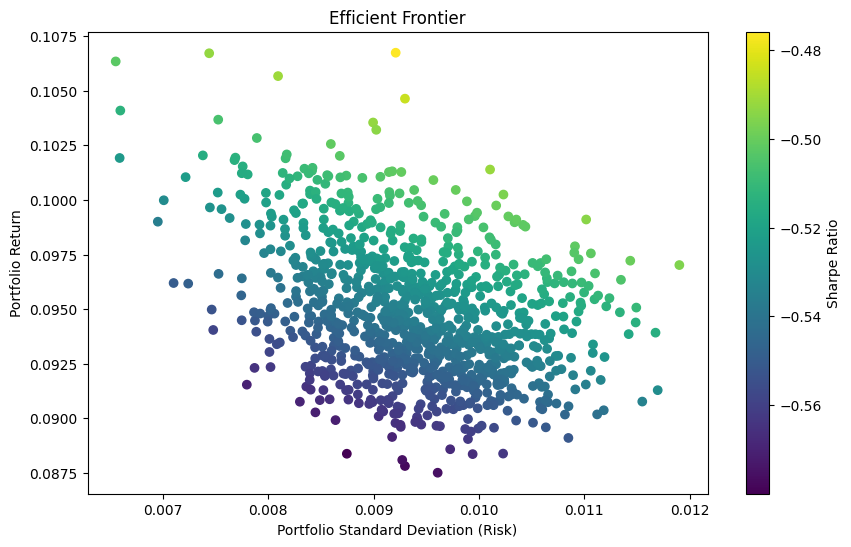

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def portfolioPerformance(weights, mu, cov):
  returns = np.dot(weights, mu)
  std = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
  return returns, std

def generatePortfolios(n, mu, cov, rf):
  results = np.zeros((3, n))

  for i in range(n):
    weights = np.random.random(len(mu))
    weights /= np.sum(weights)
    mu_, sigma_ = portfolioPerformance(weights, mu, cov)
    results[0,i] = mu_
    results[1,i] = sigma_
    results[2,i] = (mu_ - rf) / sigma_  # Sharpe Ratio

  return results


results = generatePortfolios(1000, mu, covMatrix, 0.06)

# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], marker='o')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()

Max Sharpe Ratio Portfolio

In [ ]:
def sharpeRatio(weights, mu, cov, rf):
    returns = np.dot(weights, mu)
    std = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    return (returns - rf) / std

def maxSharpeRatio(mu, cov, rf):
    n = len(mu)
    initialWeights = np.ones(n) / n
    constraints = ({'type': 'eq', 'fun': weightConstraint})
    bounds = [(0, 1) for i in range(n)]
    result = minimize(lambda weights: -sharpeRatio(weights, mu, cov, rf), initialWeights, method = 'SLSQP', bounds = bounds, constraints = constraints)
    return result.x

maxSharpePortfolio = maxSharpeRatio(mu, covMatrix, 0.06)
print("Max Sharpe Ratio Portfolio:", maxSharpePortfolio)

Max Sharpe Ratio Portfolio: [1.00000000e+00 5.34294831e-16 3.89133170e-14 2.95943825e-14
 0.00000000e+00 2.97678548e-14 8.32667268e-16 1.19904087e-14]


Value at Risk

In [ ]:
# Historical Simulation
portfolioReturns = np.dot(mvp[0], [data[ticker]['RoR'] for ticker in data])
var1 = np.percentile(portfolioReturns, 5)

# Parametric VaR
portfolioSTD = mvp[1]
var2 = portfolioReturns.mean() - 1.645 * portfolioSTD

print("Historical Simulation VaR:", var1)
print("Parametric VaR:", var2)

Historical Simulation VaR: -0.10499179252936527
Parametric VaR: -0.13162048979593163


# **Worksheet 8**

## Q1

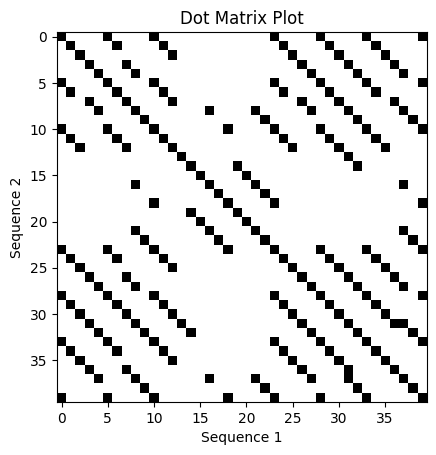

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dotMatrix(seq1, seq2, windowSize, threshold):
    matrix = np.zeros((len(seq1) - windowSize + 1, len(seq2) - windowSize + 1))
    for i in range(len(seq1) - windowSize + 1):
        for j in range(len(seq2) - windowSize + 1):
            if sum([1 for k in range(windowSize) if seq1[i + k] == seq2[j + k]]) >= threshold:
                matrix[i, j] = 1
    return matrix

def dotMatrix2(seq1, seq2, windowSize, threshold):
    seq1Arr = np.array(list(seq1))
    seq2Arr = np.array(list(seq2))
    matrix = np.zeros((len(seq1) - windowSize + 1, len(seq2) - windowSize + 1))

    for i in range(len(seq1) - windowSize + 1):
        for j in range(len(seq2) - windowSize + 1):
            if np.sum(seq1Arr[i: i + windowSize] == seq2Arr[j: j + windowSize]) >= threshold:
                matrix[i, j] = 1

    return matrix

seq = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
windowSize = 4
threshold = 3
matrix = dotMatrix(seq, seq, windowSize, threshold)

plt.imshow(matrix, cmap = 'binary')
plt.xlabel("Sequence 1")
plt.ylabel("Sequence 2")
plt.title("Dot Matrix Plot")
plt.show()

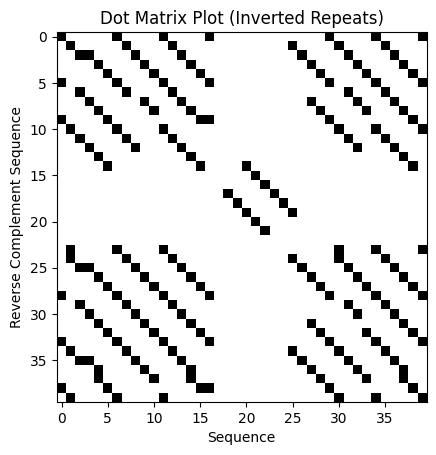

In [ ]:
def reverseComplement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join([complement[base] for base in seq[::-1]])

seq = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
windowSize = 4
threshold = 3
revCompSeq = reverseComplement(seq)
matrix = dotMatrix(seq, revCompSeq, windowSize, threshold)

plt.imshow(matrix, cmap = 'binary')
plt.xlabel("Sequence")
plt.ylabel("Reverse Complement Sequence")
plt.title("Dot Matrix Plot (Inverted Repeats)")
plt.show()

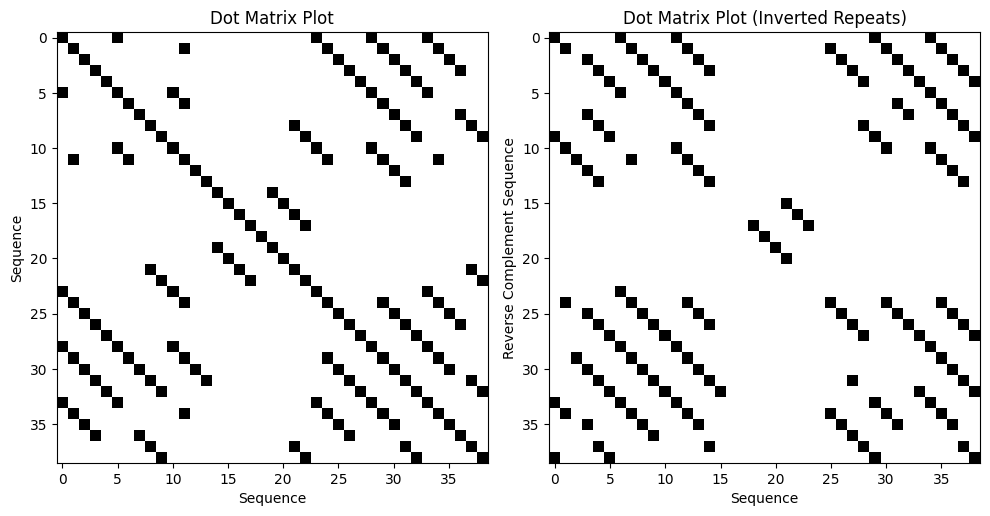

In [ ]:
seq = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
windowSize = 5
threshold = 4
revCompSeq = reverseComplement(seq)
matrix1 = dotMatrix(seq, seq, windowSize, threshold)
matrix2 = dotMatrix(seq, revCompSeq, windowSize, threshold)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].imshow(matrix1, cmap = 'binary')
axes[0].set_xlabel("Sequence")
axes[0].set_ylabel("Sequence")
axes[0].set_title("Dot Matrix Plot")

axes[1].imshow(matrix2, cmap = 'binary')
axes[1].set_xlabel("Sequence")
axes[1].set_ylabel("Reverse Complement Sequence")
axes[1].set_title("Dot Matrix Plot (Inverted Repeats)")

plt.tight_layout()
plt.show()

## Q2

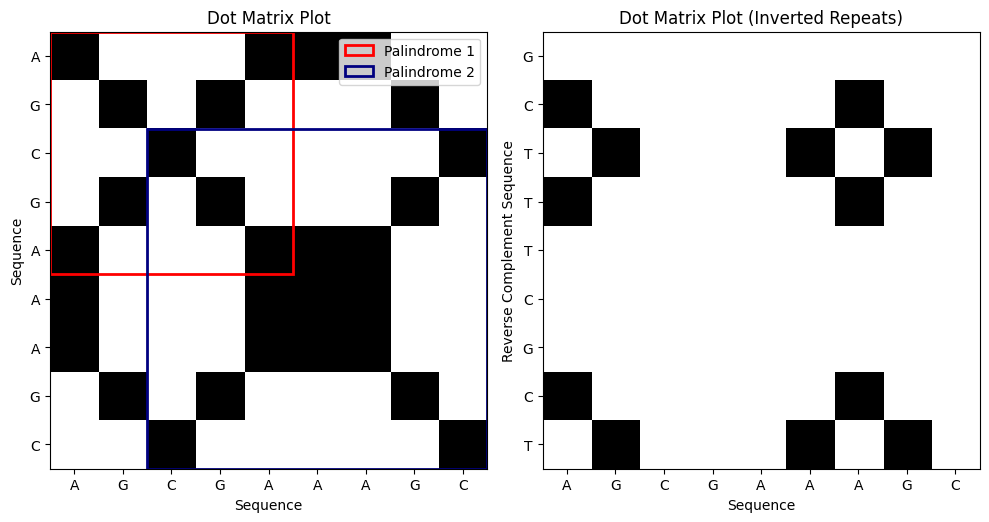

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# dogSeq = "ATGCTTTTTATCTTTAACTTCTTGTTTTCCCCACTTCCAACCCCGGCACTAATCTGCATCCTGACCTTTGGAGCCGCCATCTTCCTGTGGTTGATCAATAGACCTCAGCCCGTCTTGCCTTTTGTGGATTTGGACAACCAGTCGGTGGGAATTGAGGGAGGGGCACGGAAGGGTACTGGCCAGAAGACCAATGACCCACTGTGTTACTACTACTCAGATGTCAAGACAATGTATGACGTTTTCCAAAGAGGACTTGCTGTGTCTGACAATGGGCCTTGCTTGGGATATAGAAAACCAAACCAGCCCTACAAATGGCTGTCCTACAGGCAGGTGTCTGATCGCGCAGAGTACCTGGGCTCCTGTCTCTTGCATAAAGGATATGAGCCATCATCCGACCAATCTGTTGGCATCTTTGCTCAGAATAGGCCAGAGTGGATCATCTCCGAGTTGGCTTGTTACACATACTCCATGGTAGCCGTCCCCCTGTATGACACCTTGGGAGCAGAAGCCATCATATACATTGTCAACAAGGCTGATATCGCCGCAGTGATCTGTGATACTCCCCAAAAGGCATCAACCCTGATAGAGAATATGGAGAAGGGCCTCACCCCGGGCTTGAAAATGATCATCCTCATGGATCCCTTTGAGGATGACCTGAAGGAAAGAGCAGAGAAATGTGGAATTGAGATCTTATCTCTGTTTGATGCGGAGATTCTAGGCAAAGAGAACTTCAGAAAACCTGTGCCTCCTAGACCAGAAGACCTGAGTATCATCTGCTTTACTAGTGGGACCACAGGTGACCCTAAAGGAGCCATGCTGACCCATCAAAATATTATTTCAAATGTTTCTTCTTTCCTCAAATGTATGGAGTATACTTTCAAGCCCACCCCTGAAGATGTGACCATATCCTACCTGCCCTTGGCTCATATGTTTGAGAGGATTGTACAGGCTGTTATATATTCTTGTGGTGCCAGAGTTGGTTTCTTCCAAGGAGATATTCGGTTGCTACCTGAGGACCTGAAAACTCTAAAGCCCACACTTTTTCCTTCTGTGCCTCGACTACTCAACAGGATCTATGATAAGGTACAAAATGAAGCCAAGACACCCTTGAAGAAGTTTTTATTGAACTTGGCTATTTCCTGTAAATTCAATGAAGTGAAAAAGGGTATCATCAGGCGTGACAGTATTTGGGACAAGCTCATCTTTGCAAAGATCCAGGCCACCCTTGGAGGGAGAATAAACTTTGTGGTTACTGGAGCCGCCCCCATCTCTTCTCCAGTCCTGATGTTCCTCCGGGCAGCGCTGGGATGTCCGGTGTTCGAAGCTTATGGTCAAACAGAATGCACCGCTGGCTGTACATTTACATCACCTGGGGACTGGACATCAGGGCATGTTGGAGTCCCCCTGGCTTGCAATCATGTGAAGCTAGAAGATGTACCTGACATGAACTACTTTTCAGTGAACAATGAAGGAGAGATCTGCATCAAGGGCAGCAATGTGTTCAAAGGATACCTGAAGGATCCTGAGAAAACCAAGGAAGCTCTGGATGAGGATGGCTGGCTTCACACAGGAGACATTGGTCGTTGGCTCCCGAATGGAACTCTGAAGATCATTGACCGTAAAAAGAACATTTTCAAGCTGGCCCAAGGAGAATACATTGCTCCAGAGAAGATAGAAAATATCTACATCAGGAGTAGACCAGTGTCACAAATTTTTGTGCACGGGGACAGCTTACGGTCCTCCTTAGTGGGAGTGGTGGTTCCTGACCCAGAAGTACTGCCATCATTTGTAGCCAAACTTGGGGTTAAAGGCTCCCTCGAAGAACTGTGCAAAAACAATAATGTAAGGGAAGCCATTTTAGAAGACTTGCAGAAAGTTGGGAAAGACGGTGGTCTTAAGTCCTTTGAGCAGGTCAAAAACATCTTTCTTCAACTAGAGCCATTTTCCATTGAAAATGGACTCTTGACACCAACACTGAAAGCAAAGCGGGGAGAGCTTTCCAAGTACTTTCGAACCCAAATCAACAGCCTGTATGAGAACATCCAGGAGTAG"
# dogSeq = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
dogSeq = "AGCGAAAGC"

def dotMatrix(seq1, seq2, windowSize, threshold):
    matrix = np.zeros((len(seq1) - windowSize + 1, len(seq2) - windowSize + 1))
    for i in range(len(seq1) - windowSize + 1):
        for j in range(len(seq2) - windowSize + 1):
            if sum([1 for k in range(windowSize) if seq1[i + k] == seq2[j + k]]) >= threshold:
                matrix[i, j] = 1
    return matrix

def reverseComplement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join([complement[base] for base in seq[::-1]])

revCompSeq = reverseComplement(dogSeq)
windowSize = 1
threshold = 1

matrix1 = dotMatrix(dogSeq, dogSeq, windowSize, threshold)
matrix2 = dotMatrix(dogSeq, revCompSeq, windowSize, threshold)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].imshow(matrix1, cmap = 'binary')
axes[0].set_xlabel("Sequence")
axes[0].set_ylabel("Sequence")
axes[0].set_xticks(list(range(9)))
axes[0].set_yticks(list(range(9)))
axes[0].set_xticklabels(list(dogSeq))
axes[0].set_yticklabels(list(dogSeq))
axes[0].set_title("Dot Matrix Plot")
axes[0].add_patch(plt.Rectangle((-0.5, -0.5), 5, 5, fill = False, edgecolor = 'red', linewidth = 2, label = 'Palindrome 1'))
axes[0].add_patch(plt.Rectangle((1.5, 1.5), 7, 7, fill = False, edgecolor = 'navy', linewidth = 2, label = 'Palindrome 2'))
axes[0].legend()

axes[1].imshow(matrix2, cmap = 'binary')
axes[1].set_xlabel("Sequence")
axes[1].set_ylabel("Reverse Complement Sequence")
axes[1].set_xticks(list(range(9)))
axes[1].set_yticks(list(range(9)))
axes[1].set_xticklabels(list(dogSeq))
axes[1].set_yticklabels(list(revCompSeq))
axes[1].set_title("Dot Matrix Plot (Inverted Repeats)")

plt.tight_layout()
plt.show()

* For **perfectly aligned sequences** there is a *diagonal formation* of dot plot.
* For **palindromic sequences** i. e. for sequences that are symmetrical from the midpoint of the sequence, there exist *2 intersecting diagonals* on the plot.
* Self -complementarity of DNA sequences (also called **inverted repeats**), for example, those that form the stems of a hairpin structure, can also be identiﬁed using a dot plot. In this case, a DNA sequence is compared with its reverse-complemented sequence. *Parallel diagonals* represent the inverted repeats.

# **Practice**

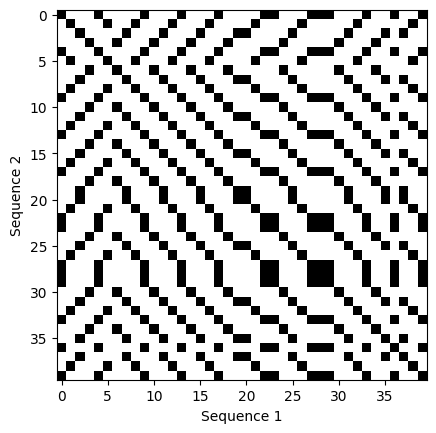

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def revComp(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join([complement[i] for i in seq[::-1]])

def dotMatrix(seq1, seq2, windowSize, threshold):
    seq1 = np.array(list(seq1))
    seq2 = np.array(list(seq2))
    matrix = np.zeros((len(seq1) - windowSize + 1, len(seq2) - windowSize + 1))

    for i in range(len(seq1) - windowSize + 1):
        for j in range(len(seq2) - windowSize + 1):
            if np.sum(seq1[i: i + windowSize] == seq2[j: j + windowSize]) >= threshold:
                matrix[i, j] = 1
    return matrix

seq = "AGCTAGTCGATCGATCGATCCGAATCGAAATCGATCACGA"

# matrix = dotMatrix(seq, revComp(seq), 1, 1)
matrix = dotMatrix(seq, seq, 1, 1)

plt.imshow(matrix, cmap = 'binary')
plt.xlabel("Sequence 1")
plt.ylabel("Sequence 2")
plt.show()

In [ ]:
import pandas as pd
from datetime import datetime

data = {}
data['Axis'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Axis.csv', usecols = ['Month', 'Close Price', 'Open Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Federal'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Federal.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['Baroda'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/Baroda.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['SBI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/SBI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['HDFC'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/HDFC.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['ICICI'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/ICICI.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['PNB'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/PNB.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')
data['KotakMahindra'] = pd.read_csv('/content/drive/MyDrive/SEM-8/CF/SIM/Bank Stocks/KotakMahindra.csv', usecols = ['Month', 'Open Price', 'Close Price', 'High Price', 'Low Price'], parse_dates = ['Month'], date_format = '%B-%Y', index_col = 'Month')